## Test af forskellige metoder og generelt en notesbog med diverse mulige nødvednigheder

In [59]:
###############
### IMPORTS ###
###############

#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Feature extraction (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## Loading in data, exploring it and converting it.
trainDataNP = np.load("fashion_train.npy")
testDataNP = np.load("fashion_test.npy")

# trainData = pd.DataFrame(trainDataNP)
# testData = pd.DataFrame(testDataNP)

# trainData.head(10)


## PART 1 - Visualisation and exploratory data analy
#Scatterplot of data projected to the first two principal components
#EVT det her?

###########
### PCA ###
###########

# def train_scaler(X):
# 	'''Train the standardizing scaler. Save the result.
	
# 	Args:
# 		X (pandas.DataFrame): Data Frame of features.
# 	'''

# 	std_scl = StandardScaler().set_output(transform='pandas')
# 	std_scl.fit_transform(X)

# 	pk.dump(std_scl, open('scaler.pkl', 'wb'))	

# # Standardize feature data
# def apply_scalar(X):
# 	'''Standardize the input.

#     Args:
#         X (pandas.DataFrame): Data Frame of features.

#     Returns:
#         X_std (pandas.DataFrame): Array containg standardized features.    
#     '''

# 	scaler = pk.load(open('scaler.pkl', 'rb'))
# 	X_scaled = scaler.transform(X)

# 	return X_scaled

# def train_pca(X, n=0.95):
# 	'''Train PCA. Save the result.

# 	Args:
# 	    X (pandas.DataFrame): Data Frame of features.
# 	    n (float): Percentage of variation that should be explained by the chosen features.
# 	'''

# 	# X_normalized = (X - X.mean()) / X.std()
# 	pca = PCA(n_components=n)
# 	pca.fit_transform(X)

# 	pk.dump(pca, open('pca.pkl', 'wb'))

# def apply_pca(X):
# 	'''Apply pca to X.

# 	Args:
# 	    X (pandas.DataFrame): Data Frame of features.
# 	    n (float): Percentage of variation that should be explained by the chosen features.

# 	Returns:
# 	    X_std_pca (numpy.ndarray): Array containg transformed, standardized features.    
# 	'''

# 	pca = pk.load(open('pca.pkl', 'rb'))
# 	X_transformed = pca.transform(X)

# 	return X_transformed

#plotting
# plt.scatter()
# plt.show()

#Scatterplot of data projected to the first two linear discriminant variables


## PART 2


        # print('Shape of alpha:', alpha.shape)
        # print('Shape of alpha.T:', alpha.T.shape)
        # print('Shape of beta:', beta.shape)
        # print('Shape of beta.T:', beta.T.shape)

Attempting to create a dimensionality reduction LDA:

In [50]:
class LDA:
    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.class_labels = np.unique(y_train)
        self.coeffs, self.constants = self.compute_coeffs_and_constants()

    def compute_class_stats(self, class_label):
        '''Compute class specific statistics.'''
        class_data = self.X_train[self.y_train == class_label]
        class_sample_mean = np.mean(class_data, axis = 0)
        class_sample_var = np.var(class_data, axis = 0)
        class_sample_prior = np.sum(y_train == class_label) / len(y_train)
        return class_sample_mean, class_sample_var, class_sample_prior

    def compute_coeffs_and_constants(self):
        '''Compute coefficients and constants for each class.'''
        coeffs = {} # Initialize empty dictionary for coefficients
        constants = {} # Initialize empty dictionary for constants

        # Iterate over each class
        for class_label in self.class_labels:

            # Get statistics for class
            sample_mean, sample_var, sample_prior = self.compute_class_stats(class_label)
            
            # Compute coefficient
            epsilon = 1e-12 # Small constant to avoid division by zero
            alpha = sample_mean / (sample_var + epsilon)

            # Compute constant
            beta = -(np.sum(sample_mean**2) / (2 * np.sum(sample_var))) + np.log(sample_prior)

            # Record coefficient and constant in dictionaries
            coeffs[class_label] = alpha
            constants[class_label] = beta

        return coeffs, constants

    def discriminant(self, X, alpha, beta):
        '''Compute the discriminant value for an input value or array X.'''
        return np.dot(X, alpha) + beta

    def predict(self, X):
        '''Predict class for an input value or array X.'''
        discriminants = np.array([self.discriminant(X, self.coeffs[class_label], self.constants[class_label]) for class_label in self.class_labels])
        predicted_labels = np.argmax(discriminants, axis = 0)
        predicted_classes = np.array(self.class_labels)[predicted_labels]
        return predicted_classes

    def transform(self, X, n_components):
        '''Project data onto the linear discriminant space.'''
        
        # Initialize empty array to store projected data
        projected_data = np.zeros((len(X), len(self.class_labels)))

        # Iterate over each class
        for idx, class_label in enumerate(self.class_labels):
            # Project data using the pre-computed coefficients and constants
            projected_data[:, idx] = np.dot(X, self.coeffs[class_label]) + self.constants[class_label]

        return projected_data[:, :n_components]

In [60]:
# Split data into X and y arrays

X_train = trainDataNP[:, :-1]
y_train = trainDataNP[:, -1]
X_test = testDataNP[:, :-1]
y_test = testDataNP[:, -1]

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [66]:
# Initialize and train LDA model
lda_model = LDA()
lda_model.fit(X_train_scaled, y_train)

y_pred = lda_model.predict(X_test)

accuracy_score(y_test, y_pred)

# # Project data
# projected_data = lda_model.transform(X_train, n_components = 2)

# class_labels = np.unique(y_train)

# # Create a scatter plot
# for idx, class_label in enumerate(class_labels):
#     class_data = projected_data[y_train == class_label]
#     plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}')

# plt.xlabel('Linear Discriminant 1')
# plt.ylabel('Linear Discriminant 2')
# plt.title('Scatterplot of Data Projected to Linear Discriminant Space')
# plt.legend()
# plt.show()

0.6066

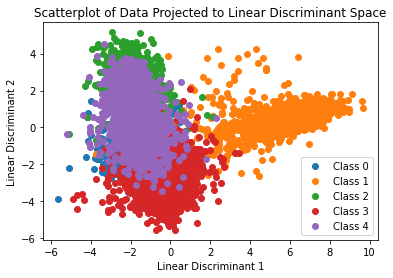

In [41]:
# Compare to scikit learn model
sklearn_lda = LinearDiscriminantAnalysis(n_components = 2)
sklearn_lda.fit(X_train, y_train)

# Project data
sklearn_projected_data = sklearn_lda.transform(X_train)
sklearn_projected_data

# Create a scatter plot
for idx, class_label in enumerate(class_labels):
    class_data = sklearn_projected_data[y_train == class_label]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}')

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('Scatterplot of Data Projected to Linear Discriminant Space')
plt.legend()
plt.show()